In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
import sklearn

In [10]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [11]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [12]:
print(raw_df)

             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

In [13]:
raw_df.values


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.0000e+00, 2.9600e+02,
        1.5300e+01],
       [3.9690e+02, 4.9800e+00, 2.4000e+01, ...,        nan,        nan,
               nan],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       ...,
       [3.9345e+02, 6.4800e+00, 2.2000e+01, ...,        nan,        nan,
               nan],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [3.9690e+02, 7.8800e+00, 1.1900e+01, ...,        nan,        nan,
               nan]])

In [14]:
data


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [15]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [19]:
X= boston[100:]
Y=target[100:]
X_test=boston[:100]
Y_test=target[:100]

In [20]:
print(X.shape,Y.shape,X_test.shape,Y_test.shape)

(406, 13) (406,) (100, 13) (100,)


In [18]:
boston = pd.DataFrame(data, columns=feature_names)

In [17]:
feature_names=np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
u=np.mean(boston,axis=0)

In [23]:
std=np.std(boston,axis=0)

In [24]:
u,std

(CRIM         3.613524
 ZN          11.363636
 INDUS       11.136779
 CHAS         0.069170
 NOX          0.554695
 RM           6.284634
 AGE         68.574901
 DIS          3.795043
 RAD          9.549407
 TAX        408.237154
 PTRATIO     18.455534
 B          356.674032
 LSTAT       12.653063
 dtype: float64,
 CRIM         8.593041
 ZN          23.299396
 INDUS        6.853571
 CHAS         0.253743
 NOX          0.115763
 RM           0.701923
 AGE         28.121033
 DIS          2.103628
 RAD          8.698651
 TAX        168.370495
 PTRATIO      2.162805
 B           91.204607
 LSTAT        7.134002
 dtype: float64)

In [25]:
u.shape, std.shape

((13,), (13,))

In [26]:
X=(X-u)/std
X_test=(X_test-u)/std

In [27]:
X, X_test

(         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
 100 -0.403217 -0.487722 -0.375976 -0.272599 -0.299707  0.630220  0.402727   
 101 -0.407214 -0.487722 -0.375976 -0.272599 -0.299707  0.707152  0.096906   
 102 -0.393896 -0.487722 -0.375976 -0.272599 -0.299707  0.171480  0.598310   
 103 -0.395892 -0.487722 -0.375976 -0.272599 -0.299707 -0.210329  0.669431   
 104 -0.404272 -0.487722 -0.375976 -0.272599 -0.299707 -0.167589  0.761889   
 ..        ...       ...       ...       ...       ...       ...       ...   
 501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
 502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
 503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
 504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
 505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   
 
           DIS       RAD       TAX   PTRATIO         B     LST

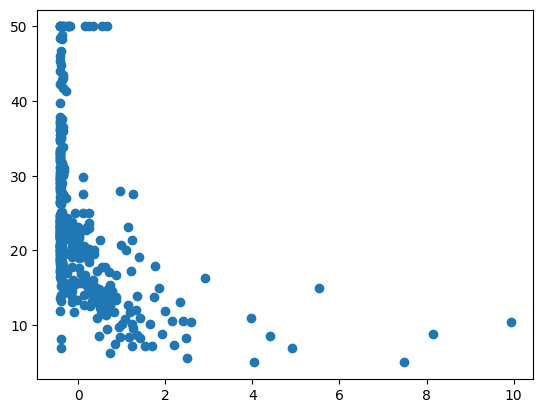

In [30]:
plt.scatter(X[:,1], Y)
plt.show()

In [ ]:
import seaborn as sns

In [29]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X[:4, :])

[[ 1.         -0.40321737 -0.48772236 -0.37597609 -0.27259857 -0.29970737
   0.63022001  0.40272699 -0.48356578 -0.52300145 -0.14395131  1.13022958
   0.41758821 -0.45319071]
 [ 1.         -0.40721363 -0.48772236 -0.37597609 -0.27259857 -0.29970737
   0.70715158  0.09690607 -0.44634438 -0.52300145 -0.14395131  1.13022958
   0.42657898 -0.69849483]
 [ 1.         -0.39389588 -0.48772236 -0.37597609 -0.27259857 -0.29970737
   0.17147991  0.59831014 -0.51356157 -0.52300145 -0.14395131  1.13022958
  -3.13442533 -0.28358043]
 [ 1.         -0.39589168 -0.48772236 -0.37597609 -0.27259857 -0.29970737
  -0.21032861  0.66943128 -0.51356157 -0.52300145 -0.14395131  1.13022958
   0.41440854  0.1103079 ]]


In [31]:
def hypothesis(x, theta):
  y_ = 0
  n = x.shape[0]

  for i in range(n):
    y_ += theta[i]*x[i]

  return y_
     

In [32]:

def cost(X, Y, theta):
  m = X.shape[0]
  total_error = 0

  for i in range(m):
    y_p = hypothesis(X[i], theta)

    total_error += (y_p - Y[i])**2

  return total_error/m

In [33]:
def gradient(X, Y, theta):
  m, n = X.shape

  grad = np.zeros((n,))

  for j in range(n):
    for i in range(m):

      x = X[i]

      y_p = hypothesis(x, theta)

      y_t = Y[i]

      grad[j] += (y_p - y_t)*x[j]
    
  return grad/m

In [34]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 3000):

  m, n = X.shape
  theta = np.zeros((n, ))
  cost_epoch = []

  for i in range(max_steps):

    grad = gradient(X, Y, theta)

    e = cost(X, Y, theta)
    cost_epoch.append(e)

    for j in range(n):

      theta[j] = theta[j] - learning_rate*grad[j]

  return theta, cost_epoch

In [35]:
theta , cost_epoch = gradient_descent(X,Y,learning_rate=0.001, max_steps=4000)

In [36]:
theta


array([22.09260297, -0.76871586,  1.02196862, -0.15501688,  0.7794405 ,
       -1.12345902,  2.96653019, -0.23775222, -2.61030779,  0.97582149,
       -0.34926633, -2.05809495,  0.9800795 , -3.68544171])

In [37]:
cost_epoch

[606.8429802955662,
 605.4804343812357,
 604.1221407952171,
 602.7680747319856,
 601.418211642738,
 600.0725272321187,
 598.7309974549777,
 597.3935985131706,
 596.0603068524086,
 594.7310991591497,
 593.4059523575244,
 592.0848436063114,
 590.7677502959523,
 589.4546500455979,
 588.1455207002067,
 586.8403403276719,
 585.5390872159951,
 584.2417398704907,
 582.9482770110312,
 581.6586775693328,
 580.3729206862673,
 579.090985709224,
 577.8128521894926,
 576.5384998796924,
 575.2679087312305,
 574.0010588917929,
 572.7379307028743,
 571.4785046973357,
 570.2227615969982,
 568.9706823102664,
 567.7222479297864,
 566.4774397301311,
 565.2362391655226,
 563.9986278675798,
 562.7645876430936,
 561.5341004718432,
 560.30714850443,
 559.0837140601436,
 557.8637796248595,
 556.6473278489644,
 555.4343415453035,
 554.2248036871624,
 553.0186974062715,
 551.8160059908394,
 550.6167128836081,
 549.4208016799427,
 548.2282561259384,
 547.0390601165547,
 545.8531976937791,
 544.670653044807,
 543.

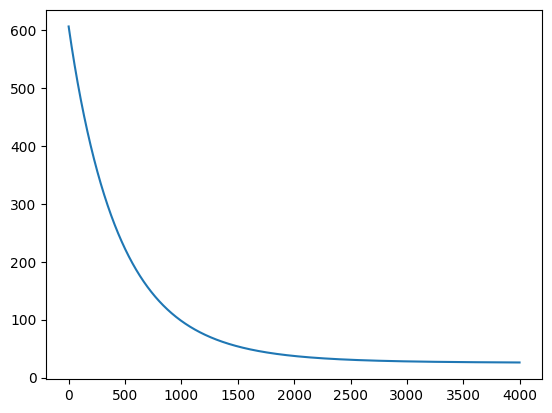

In [38]:
plt.plot(cost_epoch)

In [39]:
y_pred_test = []

In [43]:
for i in range(X_test.shape[0]):
  pred = hypothesis(X_test[i], theta)
  y_pred_test.append(pred)

y_pred_test = np.array(y_pred_test)

In [44]:
X_test.shape[0]

100

In [41]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test[:13, :13], X_test.shape)

[[ 1.         -0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743
   0.41367189 -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038
   0.44105193]
 [ 1.         -0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221
   0.19427445  0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415
   0.44105193]
 [ 1.         -0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221
   1.28271368 -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415
   0.39642699]
 [ 1.         -0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384
   1.01630251 -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321
   0.41616284]
 [ 1.         -0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384
   1.22857665 -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321
   0.44105193]
 [ 1.         -0.41704368 -0.48772236 -1.30687771 -0.27259857 -0.83528384
   0.20709638 -0.35115713  1.07773662 -0.75292215 -1.10611514  0.1130321
   0.41057102]
 [ 1.         -0.41024282

In [54]:
for i in range(len(y_pred_test)):
  print(y_pred_test[i], Y_test[i])

30.417975924013305 24.0
24.029674550600987 21.6
30.005157938753953 34.7
28.081914076533057 33.4
27.4270455057847 36.2
24.394373032838363 28.7
22.613693798759066 22.9
19.093923837851698 27.1
10.925929575759344 16.5
18.62126125355126 18.9
18.758066265168527 15.0
21.213957491574373 18.9
20.71345408314455 21.7
19.252898911538406 20.4
18.77166992100791 18.2
18.94887095388533 19.9
20.449670842939387 23.1
16.38151283891378 17.5
15.565803400014785 20.2
17.747315789143027 18.2
11.606961769182023 13.6
17.007189797858832 19.6
15.264775574451678 15.2
13.054570473613714 14.5
15.06433926313794 15.6
12.600089027029428 13.9
14.866159210449174 16.6
14.092464008426834 14.8
19.144052917362224 18.4
20.54847615565691 21.0
10.723599513030493 12.7
17.3595667343147 14.5
8.095356067197029 13.2
13.3970950582858 13.1
12.828132087455458 13.5
22.43079037918188 18.9
20.973098813131188 20.0
22.062296048683518 21.0
22.00755576620661 24.7
30.582034309830256 30.8
33.65405039375497 34.9
27.54391395220513 26.6
24.4483460

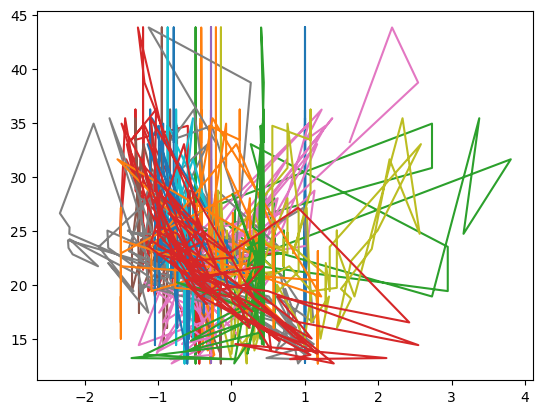

In [45]:
plt.plot(X_test,Y_test)

In [47]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test)))

MAE: 2.242761748640228
MSE: 9.802927878809824
RMSE: 3.13096277186584


In [ ]:
plt.scatter(y_pred_test,Y_test)

In [ ]:
plt.plot(y_pred_test,Y[:100])

In [ ]:
import numpy as np
datafromfile=np.genfromtxt("boston_test.csv",dtype="float",delimiter=",")
print(datafromfile)

In [28]:
file.read()

'ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat\n3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03\n6,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21\n8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15\n9,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93\n10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1\n18,0.7842,0,8.14,0,0.538,5.99,81.7,4.2579,4,307,21,386.75,14.67\n20,0.7258,0,8.14,0,0.538,5.727,69.5,3.7965,4,307,21,390.95,11.28\n25,0.75026,0,8.14,0,0.538,5.924,94.1,4.3996,4,307,21,394.33,16.3\n26,0.84054,0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21,303.42,16.51\n27,0.67191,0,8.14,0,0.538,5.813,90.3,4.682,4,307,21,376.88,14.81\n29,0.77299,0,8.14,0,0.538,6.495,94.4,4.4547,4,307,21,387.94,12.8\n30,1.00245,0,8.14,0,0.538,6.674,87.3,4.239,4,307,21,380.23,11.98\n33,1.38799,0,8.14,0,0.538,5.95,82,3.99,4,307,21,232.6,27.71\n34,1.15172,0,8.14,0,0.538,5.701,95,3.7872,4,307,21,358.77,18.35\n3

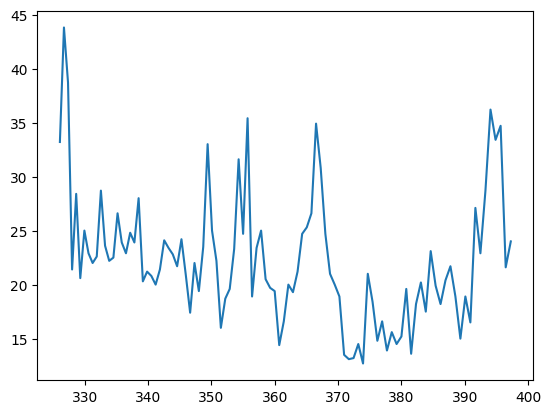

In [66]:
plt.plot(cost_epoch[200:300],Y_test)

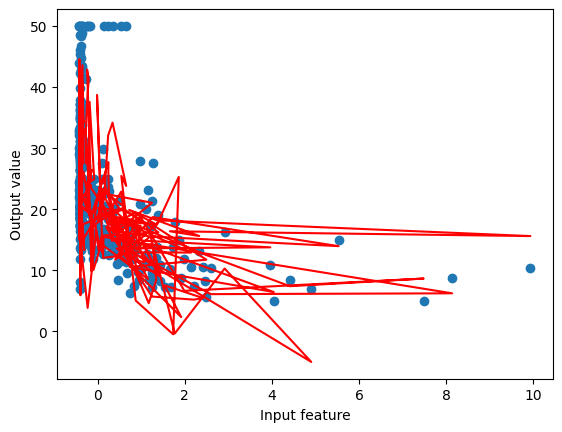

In [69]:
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], np.dot(X, theta), color='red')
plt.xlabel('Input feature')
plt.ylabel('Output value')
plt.show()

In [48]:
def R2_score(y_t, y_p):

  numerator = np.sum((y_t - y_p)**2)
  denominator = np.sum((y_t - y_t.mean())**2)

  score = (1- numerator/denominator)

  return score
     

R2_score(Y_test, y_pred_test)

0.718220994756773